In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import warnings 

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['font.size'] = 14

warnings.filterwarnings("ignore")

algos = ['qlearning', 'dqn', 'sac']
algos_name = ['Q-Learning', 'DQN', 'SAC']
cities_label = {"London":"london", 
                "New York":"newyork", 
                "Beijing":"beijing",
                "Hong Kong":"hongkong",
                "Singapore":"singapore"}


In [2]:
df_r = pd.read_csv(f'rl_training_log/return.csv')
df_r_sac = pd.read_csv(f'rl_training_log/return_sac.csv')
df_r = pd.merge(df_r, df_r_sac, on='Step', how='outer')

df_s = pd.read_csv(f'rl_training_log/global_step.csv')
df_s_sac = pd.read_csv(f'rl_training_log/global_step_sac.csv')
df_s = pd.merge(df_s, df_s_sac, on='Step', how='outer')
cols_r = {}
cols_s = {}

for c in df_r.columns:
    if 'MAX' not in c and 'MIN' not in c:
        for city in cities_label.values():
            if city in c:
                for algo in algos:
                    if algo in c:
                        cols_r[c] = city + '_' + algo
                        
for c in df_s.columns:
    if 'MAX' not in c and 'MIN' not in c:
        for city in cities_label.values():
            if city in c:
                for algo in algos:
                    if algo in c:
                        cols_s[c] = city + '_' + algo

cols_r['Step'] = 'Step'
cols_s['Step'] = 'Step'
df_r = df_r.rename(columns=cols_r)[cols_r.values()]
df_s = df_s.rename(columns=cols_s)[cols_s.values()]
df = pd.merge(df_s, df_r, on='Step')
df

,london_dqn_x,hongkong_dqn_x,newyork_dqn_x,singapore_dqn_x,london_qlearning_x,newyork_qlearning_x,beijing_dqn_x,singapore_qlearning_x,beijing_qlearning_x,hongkong_qlearning_x,...,newyork_qlearning_y,beijing_dqn_y,singapore_qlearning_y,beijing_qlearning_y,hongkong_qlearning_y,newyork_sac_y,beijing_sac_y,hongkong_sac_y,singapore_sac_y,london_sac_y
0,10100.0,10100.0,10100.0,10100.0,17518.0,17518.0,10100.0,17518.0,17518.0,17518.0,...,-240407.953125,NaN,-198395.171875,-260472.468750,-161824.000000,NaN,NaN,NaN,NaN,NaN
1,10200.0,10200.0,10200.0,10200.0,35036.0,35036.0,10200.0,35036.0,35036.0,35036.0,...,-239743.296875,NaN,-198224.343750,-259257.671875,-161159.484375,NaN,NaN,NaN,NaN,NaN
2,10300.0,10300.0,10300.0,10300.0,52554.0,52554.0,10300.0,52554.0,52554.0,52554.0,...,-238572.328125,NaN,-198269.765625,-258749.156250,-160618.218750,NaN,NaN,NaN,NaN,NaN
3,10400.0,10400.0,10400.0,10400.0,70072.0,70072.0,10400.0,70072.0,70072.0,70072.0,...,-238693.218750,NaN,-197858.218750,-257125.000000,-160688.062500,NaN,NaN,NaN,NaN,NaN
4,10500.0,10500.0,10500.0,10500.0,87590.0,87590.0,10500.0,87590.0,87590.0,87590.0,...,-238813.671875,NaN,-197541.734375,-258108.609375,-160648.468750,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,845800.0,845800.0,845800.0,845800.0,NaN,NaN,845800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-153722.984375,-140170.578125,-122026.179688,-134123.875000,-134069.265625
146,858381.0,858381.0,858381.0,858381.0,NaN,NaN,858381.0,NaN,NaN,NaN,...,NaN,-194563.078125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,863300.0,863300.0,863300.0,863300.0,NaN,NaN,863300.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-152933.343750,-140108.281250,-121777.703125,-134111.390625,-134026.015625
148,875899.0,875899.0,875899.0,875899.0,NaN,NaN,875899.0,NaN,NaN,NaN,...,NaN,-198893.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


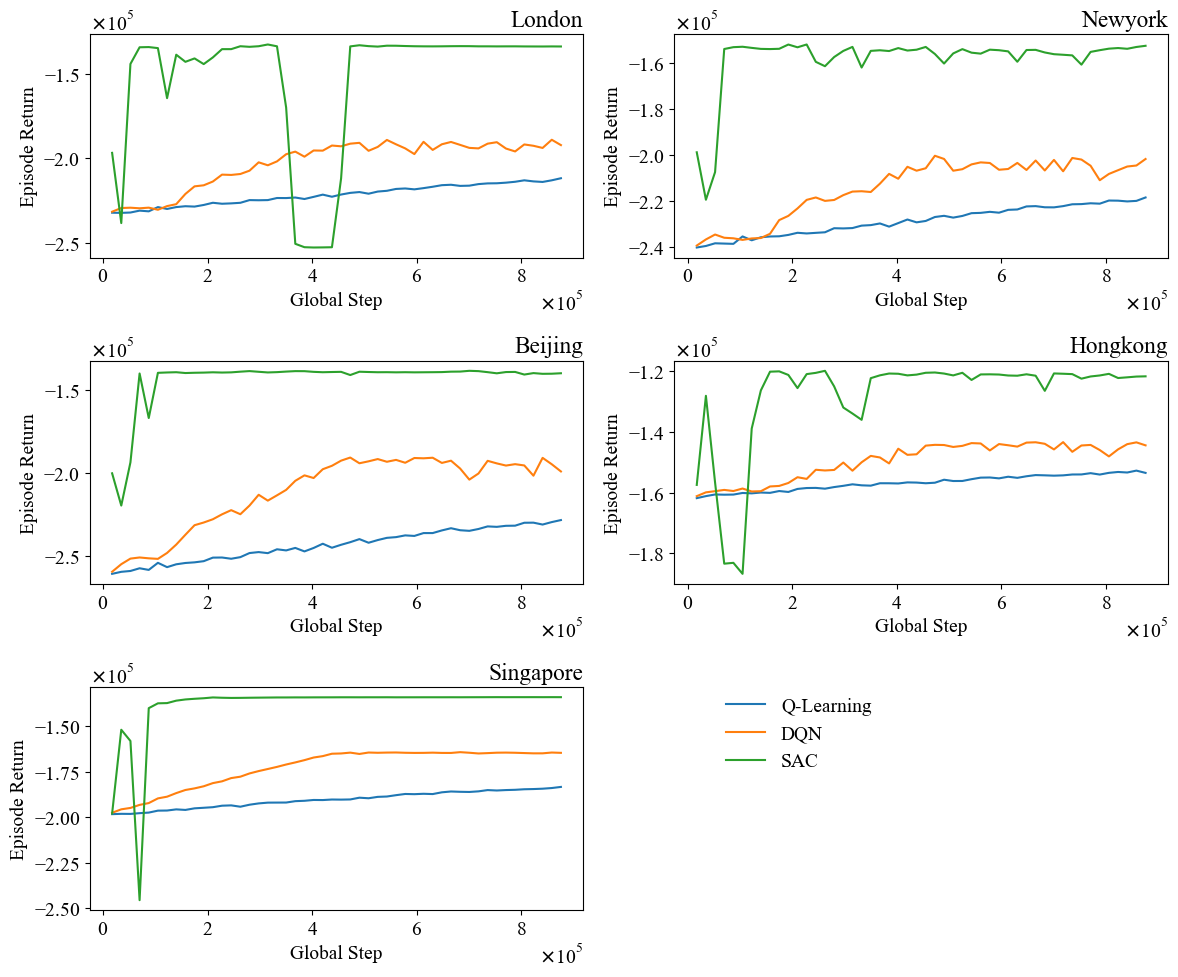

In [3]:
fig = plt.figure(figsize=(12, 10))

for city in cities_label.values():
    ax = fig.add_subplot(3, 2, list(cities_label.values()).index(city)+1)
    for algo in algos:
        sns.lineplot(data=df, x=city + '_'+ algo + '_' + 'x', y=city + '_' + algo + '_' + 'y', 
                     label=algos_name[algos.index(algo)], ax=ax, legend=False)
        ax.set_title(city.capitalize(), loc='right')
        ax.set_xlabel('Global Step')
        ax.set_ylabel('Episode Return')
        ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        ax.xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
        
handles, labels = ax.get_legend_handles_labels()[0:3]
fig.legend(handles, labels, loc='lower right', ncol=1, frameon=False, bbox_to_anchor=(0.75, 0.2))
        
plt.tight_layout()
plt.savefig('./figs/training.pdf', dpi = 300, bbox_inches='tight')

In [4]:
algo = 'qlearning'
df = pd.read_csv(f'rl_eval_data/{algo}.csv')
df

,Step,clmux/clmux-london__qlearning__1__1727071637 - EvalRewards,clmux/clmux-london__qlearning__1__1727071637 - EvalRewards__MIN,clmux/clmux-london__qlearning__1__1727071637 - EvalRewards__MAX,clmux/clmux-newyork__qlearning__1__1727071637 - EvalRewards,clmux/clmux-newyork__qlearning__1__1727071637 - EvalRewards__MIN,clmux/clmux-newyork__qlearning__1__1727071637 - EvalRewards__MAX,clmux/clmux-singapore__qlearning__1__1727071637 - EvalRewards,clmux/clmux-singapore__qlearning__1__1727071637 - EvalRewards__MIN,clmux/clmux-singapore__qlearning__1__1727071637 - EvalRewards__MAX,clmux/clmux-beijing__qlearning__1__1727071637 - EvalRewards,clmux/clmux-beijing__qlearning__1__1727071637 - EvalRewards__MIN,clmux/clmux-beijing__qlearning__1__1727071637 - EvalRewards__MAX,clmux/clmux-hongkong__qlearning__1__1727071637 - EvalRewards,clmux/clmux-hongkong__qlearning__1__1727071637 - EvalRewards__MIN,clmux/clmux-hongkong__qlearning__1__1727071637 - EvalRewards__MAX
0,50,-212058.984375,-212058.984375,-212058.984375,-218816.796875,-218816.796875,-218816.796875,-183461.31250,-183461.31250,-183461.31250,-228252.921875,-228252.921875,-228252.921875,-152956.359375,-152956.359375,-152956.359375
1,51,-212048.468750,-212048.468750,-212048.468750,-218923.562500,-218923.562500,-218923.562500,-183769.18750,-183769.18750,-183769.18750,-228159.296875,-228159.296875,-228159.296875,-153180.468750,-153180.468750,-153180.468750
2,52,-211834.328125,-211834.328125,-211834.328125,-219204.046875,-219204.046875,-219204.046875,-182838.21875,-182838.21875,-182838.21875,-227871.953125,-227871.953125,-227871.953125,-152617.531250,-152617.531250,-152617.531250


In [5]:
def get_city_label(df):
    col_label = df.columns.values.tolist()
    city = ["london", "newyork", "beijing", "hongkong", "singapore"]
    for i,l in enumerate(col_label):
        if i == 0:
            continue
        else:
            for c in city:
                if c in l:
                    city_label = c
                    if "MIN" in l:
                        city_label = c + "_MIN"
                    if "MAX" in l:
                        city_label = c +  "_MAX"
            col_label[i] = city_label
    return col_label

In [6]:
df = pd.DataFrame()
for i, algo in enumerate(algos):
    _df = pd.read_csv(f'rl_eval_data/{algo}.csv')/(48*365)
    col_label = get_city_label(_df)
    _df.columns = col_label
    _df['algo'] = algos_name[i]
    df = pd.concat([df, _df])

In [7]:
df_label = ["london", "newyork", "beijing", "hongkong", "singapore", "algo"]
df = df[df_label]
df.head()

,london,newyork,beijing,hongkong,singapore,algo
0,-12.103823,-12.489543,-13.028135,-8.730386,-10.471536,Q-Learning
1,-12.103223,-12.495637,-13.022791,-8.743177,-10.489109,Q-Learning
2,-12.091000,-12.511647,-13.006390,-8.711046,-10.435971,Q-Learning
0,-12.098335,-13.405280,-11.957999,-8.189634,-9.297743,DQN
1,-10.631507,-13.131760,-11.015407,-8.173148,-9.297743,DQN


In [8]:
mean_std = df.groupby('algo').agg([ 'mean', 'std']).round(2)
mean_std.T

algo              DQN  Q-Learning   SAC
london    mean -11.12      -12.10 -7.65
          std    0.84        0.01  0.00
newyork   mean -13.20      -12.50 -8.71
          std    0.18        0.01  0.00
beijing   mean -11.32      -13.02 -7.97
          std    0.55        0.01  0.00
hongkong  mean  -8.18       -8.73 -6.92
          std    0.01        0.02  0.00
singapore mean  -9.30      -10.47 -7.66
          std    0.00        0.03  0.00

In [9]:
df = df.melt(id_vars=['algo'], var_name='city', value_name='value')
df.head()

,algo,city,value
0,Q-Learning,london,-12.103823
1,Q-Learning,london,-12.103223
2,Q-Learning,london,-12.091000
3,DQN,london,-12.098335
4,DQN,london,-10.631507


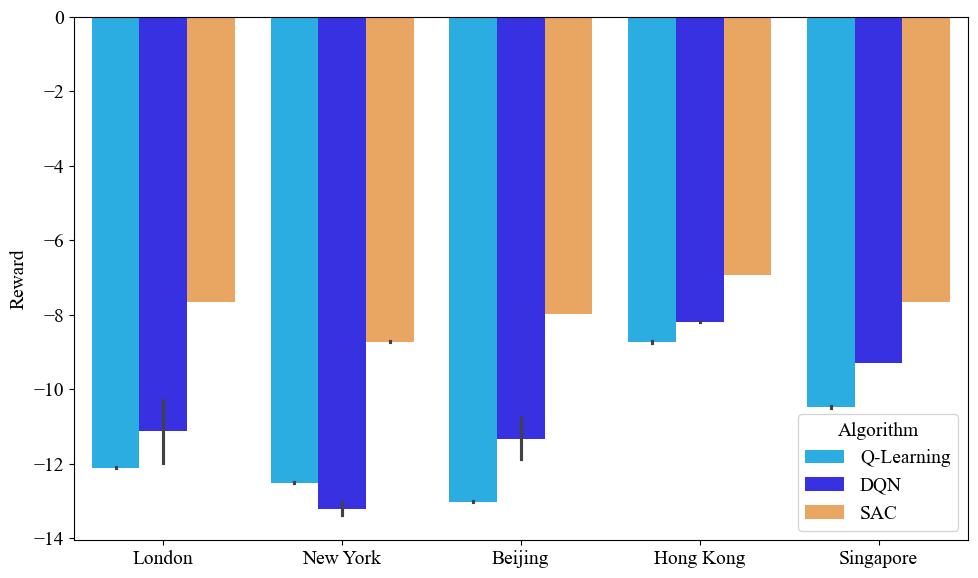

In [10]:
plt.figure(figsize=(10, 6))
palette = ["#0DBAFF", "#1C14FF", "#FFA64B", "#E02927"]
ax = sns.barplot(x='city', y='value', hue='algo', data=df, palette=palette, ci='sd', linewidth=1.5)
                #dodge=0.5, join=False, errorbar = 'sd',
                #errwidth = 1.5, scale=1.5, palette=sns.color_palette("tab10", n_colors=4, desat=1),
                #markers=['D','s','^','o'],
                #capsize = 0.2)

ax.set_ylabel('Reward')
ax.set_xlabel('')
ax.set_xticklabels(cities_label.keys())

plt.legend(title='Algorithm', loc='best')
plt.tight_layout()
plt.show()